In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [45]:
trial_dataset = pd.read_csv('../datasets/lausanne_marathon_2016_stefano.csv')
trial_dataset = trial_dataset.drop('Unnamed: 0',axis=1)

# remove useless features
trial_dataset.drop('rang',axis=1,inplace=True)
trial_dataset.drop('retard',axis=1,inplace=True)

# we can re-insert the False, if we get the walk cat
trial_dataset.drop('pace',axis=1,inplace=True) 

print(trial_dataset.shape)
trial_dataset.head()

(12059, 6)


,cat,sex,nom,an,lieu,temps
0,21,M,Abaidia Jilani,1966,St-Légier-La Chiésaz,"1:45.28,4"
1,21,F,Abaidia Sandrine,1972,St-Légier,"1:49.40,8"
2,False,F,Abaidia Selma,2006,St-Légier-La Chiésaz,"7.12,2"
3,21,M,Abb Jochen,1948,Ernen,"2:50.40,7"
4,10,M,Abbas Dhia,1961,Lausanne,"1:13.04,1"


Printing info on important runners ( :) ):

In [88]:
trial_dataset.loc[trial_dataset.nom=='Lazzari Gianrocco',:]

,cat,sex,nom,an,lieu,temps
6409,10,M,Lazzari Gianrocco,1988,Ecublens VD,"42.59,1"


Counting `False` values and remove them:

In [48]:
sum(trial_dataset.cat=='False')
trial_dataset = trial_dataset[trial_dataset.cat!='False']

trial_dataset.shape

(11247, 6)

There NO null values:

In [18]:
trial_dataset.isnull().sum()

cat       0
sex       0
nom       0
an        0
lieu      0
temps     0
retard    0
pace      0
dtype: int64

## Stats on age

Preparing data:

In [84]:
# Prepare distribution of _all_ runners' age:
age_female_10 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='10')].an
age_male_10 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='10')].an

age_female_21 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='21')].an
age_male_21 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='21')].an

age_female_42 = 2016 - trial_dataset[(trial_dataset.sex=='F') & (trial_dataset.cat=='42')].an
age_male_42 = 2016 - trial_dataset[(trial_dataset.sex=='M') & (trial_dataset.cat=='42')].an

###  Women age distribution, by race:

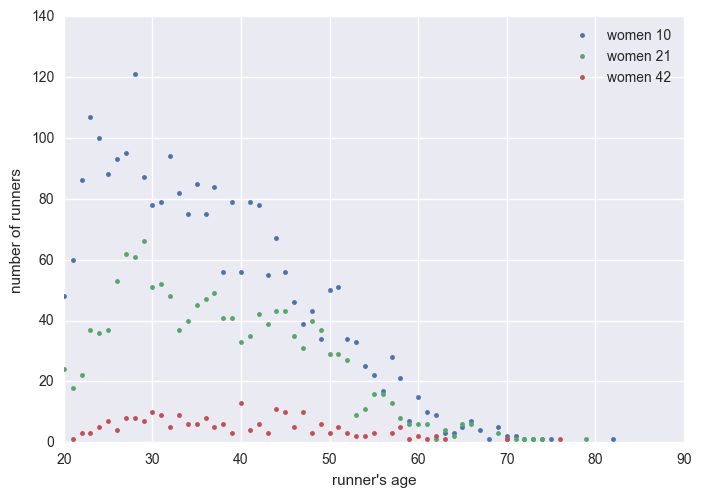

In [85]:
plt.plot(age_female_10.value_counts(),marker='.',linestyle='',label = 'women 10')
plt.plot(age_female_21.value_counts(),marker='.',linestyle='',label = 'women 21')
plt.plot(age_female_42.value_counts(),marker='.',linestyle='',label = 'women 42')

plt.xlabel('runner\'s age')
plt.ylabel('number of runners')
plt.legend()

#### Statistical test on women's age, by category:

In [92]:
stats.ks_2samp(age_female_21,age_female_10)

Ks_2sampResult(statistic=0.069158670333121799, pvalue=0.00025867599203266173)

In [93]:
stats.ks_2samp(age_female_42,age_female_21)

Ks_2sampResult(statistic=0.082361950140389606, pvalue=0.14421995770930032)

In [94]:
stats.ks_2samp(age_female_42,age_female_10)

Ks_2sampResult(statistic=0.13244659796146291, pvalue=0.0014767471293253094)

###  Men age distribution, by race:

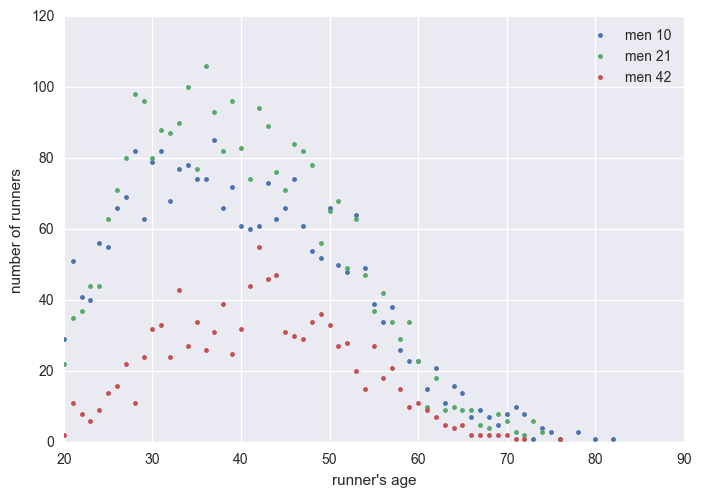

In [86]:
plt.plot(age_male_10.value_counts(),marker='.',linestyle='',label = 'men 10')
plt.plot(age_male_21.value_counts(),marker='.',linestyle='',label = 'men 21')
plt.plot(age_male_42.value_counts(),marker='.',linestyle='',label = 'men 42')

plt.xlabel('runner\'s age')
plt.ylabel('number of runners')
plt.legend()

#### Statistical test on men's age, by category:

In [89]:
stats.ks_2samp(age_male_21,age_male_10)

Ks_2sampResult(statistic=0.032486447956996067, pvalue=0.11434962823975953)

In [90]:
stats.ks_2samp(age_male_42,age_male_21)

Ks_2sampResult(statistic=0.11752974790668802, pvalue=5.5649755760621104e-10)

In [91]:
stats.ks_2samp(age_male_42,age_male_10)

Ks_2sampResult(statistic=0.11826437956082847, pvalue=9.1469336246093692e-10)

## Stats on original country 

In [14]:
# sns.countplot(y=trial_dataset.nat)
# plt.ylabel('country of origin')
# plt.xlabel('number of runners')

## Stats on town of residency

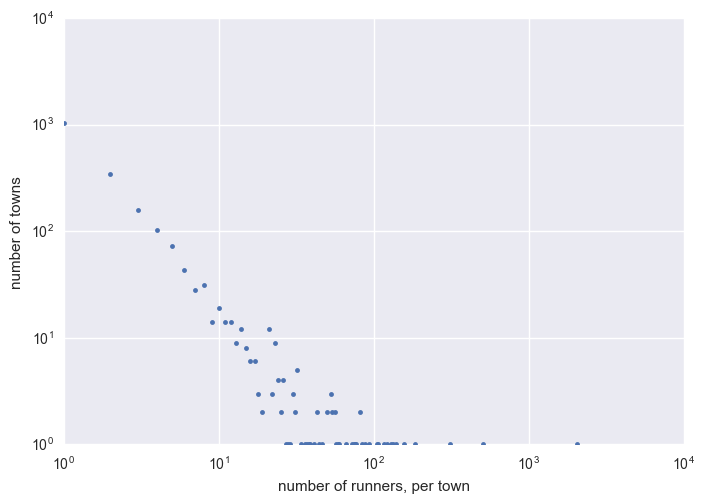

In [17]:
lieu_distr = trial_dataset.lieu.value_counts().value_counts()

plt.loglog(lieu_distr,marker='.',linestyle='')
plt.xlabel('number of runners, per town')
plt.ylabel('number of towns')

## Stats on race time

In [27]:
# issues -->  due to the presence of strings --> due to issues on parsing!!

# sns.distplot(trial_dataset.temps.astype()[15:20],kde=False) 

# OLD CODE 

In [53]:
# sns.distplot(trial_dataset[trial_dataset.sex=='F'].an,kde=False,
#             hist_kws={"histtype": "step", "linewidth": 2},label = 'women')
# sns.distplot(trial_dataset[trial_dataset.sex=='M'].an,kde=False,
#             hist_kws={"histtype": "step", "linewidth": 2},label = 'men')
